# COGS 189 Group 12 
*"Investigating the Impact of Short-Form Video Content on Cognitive Focus Using EEG"*


In [2]:
%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

## Eric Data

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


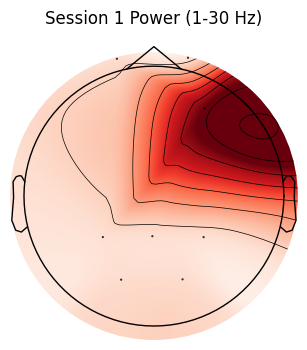

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


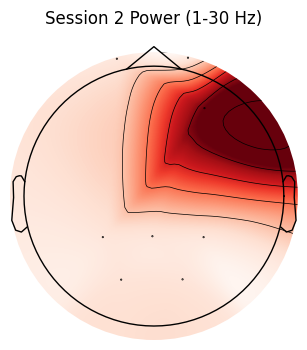

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


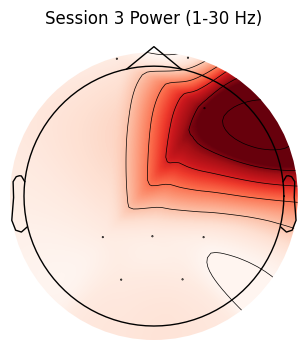

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


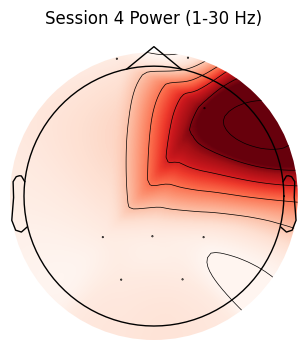

In [3]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1) YOUR CUSTOM CHANNEL NAMES (excluding GND and REF)
# --------------------------------------------------------
channel_names_custom = ["F4", "O1", "O2", "Fp1", "P3", "Pz", "P4", "Fp2"]

# We'll rename T5/T6 to T7/T8 for MNE's standard montage:
rename_dict = {"T5": "T7", "T6": "T8"}
channel_names_mne = [rename_dict[ch] if ch in rename_dict else ch 
                     for ch in channel_names_custom]

# All channels are EEG
channel_types = ["eeg"] * len(channel_names_mne)

sfreq = 250.0  # Updated to match EEG data

# Create MNE info
info = mne.create_info(ch_names=channel_names_mne, sfreq=sfreq, ch_types=channel_types)

# Attach a standard 10-20 montage
montage = mne.channels.make_standard_montage("standard_1020")
info.set_montage(montage)

# --------------------------------------------------------
# 2) LOAD EEG DATA (shape = [n_channels, n_times])
# --------------------------------------------------------
eric_eeg_data_1 = np.load("../data/eric/eeg/eeg_eric_session_1.npy")
eric_eeg_data_2 = np.load("../data/eric/eeg/eeg_eric_session_2.npy")
eric_eeg_data_3 = np.load("../data/eric/eeg/eeg_eric_session_3.npy")
eric_eeg_data_4 = np.load("../data/eric/eeg/eeg_eric_session_4.npy")
# Ensure data shape is (8, n_times) by selecting relevant channels
data_1 = eric_eeg_data_1[:len(channel_names_mne), :]
data_2 = eric_eeg_data_2[:len(channel_names_mne), :]
data_3 = eric_eeg_data_3[:len(channel_names_mne), :]
data_4 = eric_eeg_data_3[:len(channel_names_mne), :]

# --------------------------------------------------------
# 3) Create a RawArray. If needed, do additional preprocessing.
# --------------------------------------------------------
def plot_topomap(data, info, title):
    raw = mne.io.RawArray(data, info)
    
    # Apply bandpass filter (1-30 Hz)
    raw.filter(1, 30)
    
    # Compute power spectral density (PSD)
    psd = raw.compute_psd(fmin=1, fmax=30, method="welch")
    mean_psd = psd.get_data().mean(axis=1)  # Average power across frequencies
    
    # Plot topomap
    fig, ax = plt.subplots(figsize=(5, 4))
    mne.viz.plot_topomap(mean_psd, raw.info, axes=ax, show=False)
    ax.set_title(title)
    plt.show()

# Plot topomaps for each dataset
plot_topomap(data_1, info, "Session 1 Power (1-30 Hz)")
plot_topomap(data_2, info, "Session 2 Power (1-30 Hz)")
plot_topomap(data_3, info, "Session 3 Power (1-30 Hz)")
plot_topomap(data_4, info, "Session 4 Power (1-30 Hz)")


## Erics Stroop Test Dataframes

In [5]:
eric_stroop_test1 = pd.read_csv("../data/eric/stroop/stroop_eric_session_1.csv")
eric_stroop_test2 = pd.read_csv("../data/eric/stroop/stroop_eric_session_2.csv")
eric_stroop_test3 = pd.read_csv("../data/eric/stroop/stroop_eric_session_3.csv")
eric_stroop_test4 = pd.read_csv("../data/eric/stroop/stroop_eric_session_4.csv")


In [47]:
eric_stroop_test1["Timestamp"] = pd.to_datetime(eric_stroop_test1["Timestamp"])
eric_stroop_test1["Timestamp"] = eric_stroop_test1["Timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S.%f")
eric_stroop_test2["Timestamp"] = pd.to_datetime(eric_stroop_test2["Timestamp"])
eric_stroop_test2["Timestamp"] = eric_stroop_test2["Timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S.%f")
eric_stroop_test3["Timestamp"] = pd.to_datetime(eric_stroop_test3["Timestamp"])
eric_stroop_test3["Timestamp"] = eric_stroop_test3["Timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S.%f")
eric_stroop_test4["Timestamp"] = pd.to_datetime(eric_stroop_test4["Timestamp"])
eric_stroop_test4["Timestamp"] = eric_stroop_test4["Timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S.%f")

## Separating the Stroop data into the respective trials.

In [58]:
#breaking up the stroop data into the control and exeriment trials
eric_control_trail1 = eric_stroop_test1.iloc[:100]
eric_exp_trail1 = eric_stroop_test1.iloc[100:200]
eric_control_trail2 = eric_stroop_test2.iloc[:100]
eric_exp_trail2 = eric_stroop_test2.iloc[100:200]
eric_control_trail3 = eric_stroop_test3.iloc[:100]
eric_exp_trail3 = eric_stroop_test3.iloc[100:200]
eric_control_trail4 = eric_stroop_test4.iloc[:100]
eric_exp_trail4 = eric_stroop_test4.iloc[100:200]
#accuraccy
eric_accuracy1 = eric_stroop_test1.iloc[200:202]
eric_accuracy2 = eric_stroop_test2.iloc[200:202]
eric_accuracy3 = eric_stroop_test3.iloc[200:202]
eric_accuracy4 = eric_stroop_test4.iloc[200:202]

## Getting timestamps from eeg data

In [28]:
import datetime
def get_readable_timestamps(data):

    timestamps = data[-1, :]  
    readable_times = [datetime.datetime.fromtimestamp(ts).strftime("%Y-%m-%d %H:%M:%S.%f") for ts in timestamps]
    return readable_times


eric_session_1_timestamps = get_readable_timestamps(eric_eeg_data_1)
eric_session_2_timestamps = get_readable_timestamps(eric_eeg_data_2)
eric_session_3_timestamps = get_readable_timestamps(eric_eeg_data_3)
eric_session_4_timestamps = get_readable_timestamps(eric_eeg_data_4)


In [29]:
eric_session_1_timestamps

['2025-03-12 16:46:34.698240',
 '2025-03-12 16:46:34.698247',
 '2025-03-12 16:46:34.698254',
 '2025-03-12 16:46:34.698262',
 '2025-03-12 16:46:34.698269',
 '2025-03-12 16:46:34.698277',
 '2025-03-12 16:46:34.698284',
 '2025-03-12 16:46:34.698292',
 '2025-03-12 16:46:34.698299',
 '2025-03-12 16:46:34.698309',
 '2025-03-12 16:46:34.698317',
 '2025-03-12 16:46:34.698324',
 '2025-03-12 16:46:34.698331',
 '2025-03-12 16:46:34.698339',
 '2025-03-12 16:46:34.698346',
 '2025-03-12 16:46:34.698354',
 '2025-03-12 16:46:34.698361',
 '2025-03-12 16:46:34.698368',
 '2025-03-12 16:46:34.698376',
 '2025-03-12 16:46:34.698383',
 '2025-03-12 16:46:34.698393',
 '2025-03-12 16:46:34.698400',
 '2025-03-12 16:46:34.698408',
 '2025-03-12 16:46:34.698415',
 '2025-03-12 16:46:34.698423',
 '2025-03-12 16:46:34.698430',
 '2025-03-12 16:46:34.698437',
 '2025-03-12 16:46:34.698445',
 '2025-03-12 16:46:34.698452',
 '2025-03-12 16:46:35.178862',
 '2025-03-12 16:46:35.178899',
 '2025-03-12 16:46:35.178911',
 '2025-0

## making dataframea of the eeg data with the timestamps

In [67]:
# putting everything into a dataframe 
eric_eeg_values1 = data_1[:-1:]
df1 = pd.DataFrame(eric_eeg_values1.T)
df1["Timestamp"] = eric_session_1_timestamps
# second test
eric_eeg_values2 = eric_eeg_data_2[:-1:]
df2 = pd.DataFrame(eric_eeg_values2.T)
df2["Timestamp"] = eric_session_2_timestamps
#third test
eric_eeg_values3 = eric_eeg_data_3[:-1:]
df3 = pd.DataFrame(eric_eeg_values3.T)
df3["Timestamp"] = eric_session_3_timestamps
#fourth test
eric_eeg_values4 = eric_eeg_data_4[:-1:]
df4 = pd.DataFrame(eric_eeg_values4.T)
df4["Timestamp"] = eric_session_4_timestamps

## Trying to get marker data

In [5]:
# Get the marker channel index
from brainflow import BoardShim, BoardIds
marker_channel_index = BoardShim.get_marker_channel(BoardIds.CYTON_BOARD)

# Check if the marker channel is included in the data
if marker_channel_index >= eric_eeg_data_1.shape[0]:
    print("No dedicated marker channel in the data.")
    markers = None  # Handle this case as needed
else:
    markers = eric_eeg_data_1[marker_channel_index, :]
    print("Markers array:", markers)

No dedicated marker channel in the data.


## Kate Data

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


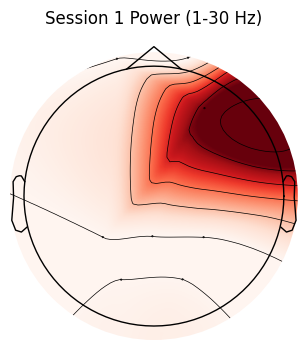

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


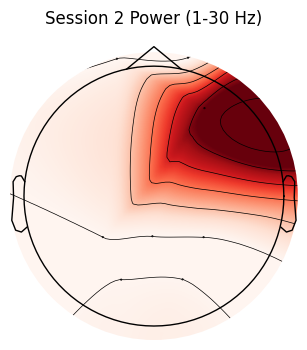

In [6]:
kate_eeg_data_1 = np.load("../data/kate/eeg/eeg_kate_session_1.npy")
kate_eeg_data_2 = np.load("../data/kate/eeg/eeg_kate_session_2.npy")
# Ensure data shape is (8, n_times) by selecting relevant channels
data_1 = kate_eeg_data_1[:len(channel_names_mne), :]
data_2 = kate_eeg_data_2[:len(channel_names_mne), :]

plot_topomap(data_1, info, "Session 1 Power (1-30 Hz)")
plot_topomap(data_2, info, "Session 2 Power (1-30 Hz)")

## Nick Data


Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


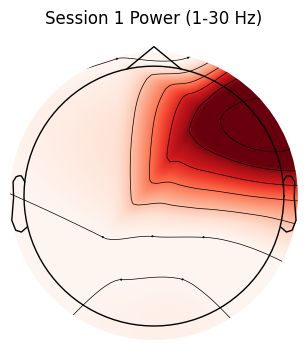

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


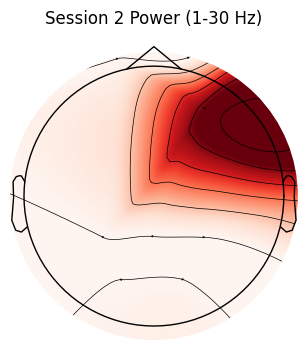

In [7]:
nick_eeg_data_1 = np.load("../data/nick/eeg/eeg_nick_session_1.npy")
nick_eeg_data_2 = np.load("../data/nick/eeg/eeg_nick_session_2.npy")
# Ensure data shape is (8, n_times) by selecting relevant channels
data_1 = nick_eeg_data_1[:len(channel_names_mne), :]
data_2 = nick_eeg_data_2[:len(channel_names_mne), :]

plot_topomap(data_1, info, "Session 1 Power (1-30 Hz)")
plot_topomap(data_2, info, "Session 2 Power (1-30 Hz)")

## Adriana Data

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


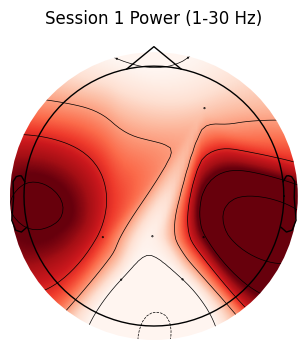

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


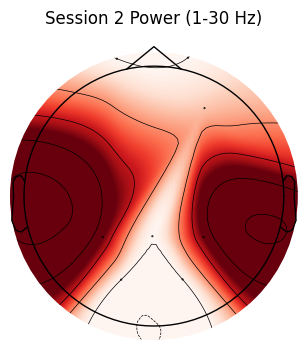

In [8]:
adri_eeg_data_1 = np.load("../data/adriana/eeg/eeg_adriana_session_1.npy")
adri_eeg_data_2 = np.load("../data/adriana/eeg/eeg_adriana_session_2.npy")

# Ensure data shape is (8, n_times) by selecting relevant channels

data_1 = adri_eeg_data_1[:len(channel_names_mne), :]
data_2 = adri_eeg_data_2[:len(channel_names_mne), :]

plot_topomap(data_1, info, "Session 1 Power (1-30 Hz)")
plot_topomap(data_2, info, "Session 2 Power (1-30 Hz)")